Timothy Wang

GitHub Username: timothyswang

USC ID: 2697040790

<center><h1>INF-552 Lab 0</h1></center>
<br>
<center><font size="4">Introduction to Basic Development Tools</font></center>

### Rules

1. Please read the instructions and problem prompts **carefully**.
2. This lab is to give you some basic APIs of numpy, pandas and scikit-learn. Besides, some topics such as how to make your jupyter notebook be a more efficient developing tools, how to use git and GitHub will also be covered. The lab is to be done individually. You may talk to your fellow classmates about general issues ("Remind me again: Which API should I used for doing group by operation to a data set") but about the specifies of how to do these exercises.
3. Along with a similar vein, you can ask the TA for help, but ask questions about **concepts** but not ask the TA to help you debug your code. The TA is here to help, but not to do the work for you.
4. You are welcome to use the class resources and the Internet.
5. Playing with variations. Solve one problems, and then copy the code to a new cell and play around with it. Doing this is the single most important thing when learning programming.
6. This lab will not be graded but the content is highly related to your future programming assignments. So, treat it wisely.
7. All the content having been gone though in the week 1 discussion is just a snapshot of the most basic concepts. **You need to keep study more about Git, GitHub, Pandas, Numpy and Scikit-Learn in order to finish your programming assignments successfully.**
8. Have fun!

### Setup Development Environment

There are many ways to setup the environment. But, I do recommend a simple idea that is using the Anaconda, which is a pre-build python environment with bundles of useful packages.

**To download the Anaconda, go to the following website:
https://www.anaconda.com/distribution/**. Download the correct version based on your operating system and install it step by step.

Then, **configure your PATH environment variable** to make the conda command work. The following command is an easy way to test whether your configuration is correct. If it is, you will see something as like as the sample output.

> **command:**
>
> conda --version
>
> **sample output:**
>
> conda 4.6.12

**Finally, download this jupyter notebook file,** then change the working directory to where its location in terminal, and type the following command to open the jupter notebook and finish the lab.

> **command:** 
> jupyter notebook

In [2]:
import pandas as pd
import numpy as np

### Pandas

#### The read_csv() Method

First, read the documentation about the *read_csv()* method in Pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Then, try to read data from file Salaries.csv to a dataframe, make the column playerID in the csv file as the index column and the first row as the header. Also, skip the second row when reading the file.

In [3]:
new_dataframe = pd.read_csv("../data/Salaries.csv", index_col="playerID", header=0, skiprows=(lambda x: x in [2]))
print(new_dataframe)

           yearID teamID lgID    salary
playerID                               
barkele01    1985    ATL   NL    870000
benedbr01    1985    ATL   NL    545000
campri01     1985    ATL   NL    633333
ceronri01    1985    ATL   NL    625000
chambch01    1985    ATL   NL    800000
...           ...    ...  ...       ...
treinbl01    2015    WAS   NL    512800
ugglada01    2015    WAS   NL    507500
werthja01    2015    WAS   NL  21000000
zimmejo02    2015    WAS   NL  16500000
zimmery01    2015    WAS   NL  14000000

[25574 rows x 4 columns]


#### Indexing and Selecting Data

Select the id of the players who are registered in ATL and HOU and whose salary is higher than one million.

In [4]:
query1 = new_dataframe.query("teamID == 'ATL' or teamID == 'HOU'")
query2 = query1.query("salary > 1000000")
print(query2.index.values) #[1]

['hornebo01' 'murphda05' 'suttebr01' 'ryanno01' 'hornebo01' 'murphda05'
 'suttebr01' 'ryanno01' 'griffke01' 'murphda05' 'suttebr01' 'ryanno01'
 'murphda05' 'suttebr01' 'smithda02' 'murphda05' 'suttebr01' 'clancji01'
 'davisgl01' 'ramirra01' 'scottmi03' 'smithda02' 'esaskni01' 'murphda05'
 'smithlo01' 'suttebr01' 'whitter01' 'clancji01' 'darwida01' 'davisgl01'
 'deshaji01' 'scottmi03' 'smithda02' 'breamsi01' 'esaskni01' 'gantro01'
 'leibrch01' 'pendlte01' 'smithlo01' 'caminke01' 'deshaji01' 'ramirra01'
 'scottmi03' 'berenju01' 'bielemi01' 'breamsi01' 'esaskni01' 'gantro01'
 'glavito02' 'leibrch01' 'nixonot01' 'penaal01' 'pendlte01' 'smithlo01'
 'smoltjo01' 'treadje01' 'biggicr01' 'caminke01' 'finlest01' 'jonesdo01'
 'portuma01' 'blausje01' 'breamsi01' 'gantro01' 'glavito02' 'justida01'
 'maddugr01' 'nixonot01' 'pendlte01' 'sandede02' 'smithpe02' 'smoltjo01'
 'biggicr01' 'caminke01' 'drabedo01' 'finlest01' 'harnipe01' 'jonesdo01'
 'portuma01' 'swindgr01' 'averyst01' 'blausje01' 'gantro01

#### The describe() Method

Calculate the standard Deviation, first quartile, medium, third quartile, mean, maximum, minimum of the salary in team ATL.

In [5]:
describe_query = new_dataframe.query("teamID == 'ATL'")
salary_query = describe_query["salary"]
salary_query.describe()

count    8.850000e+02
mean     2.208111e+06
std      3.434162e+06
min      6.000000e+04
25%      3.000000e+05
50%      6.000000e+05
75%      2.400000e+06
max      1.606180e+07
Name: salary, dtype: float64

#### The iterrows() Method

Create a Python dictionary object whose keys are the headers of the dataframe created in the read_csv() exercise and values are Python list objects that contain data corresponding to the headers. (Here, use the iterrows method to iterate each row of the dataframe and copy it to a dictionary. However, there is a easier way. Learn how the to_dict() method works by yourself later)

In [6]:
my_dict = {}
my_dict["playerID"] = []
my_dict["yearID"] = []
my_dict["teamID"] = []
my_dict["lgID"] = []
my_dict["salary"] = []

for this_entry in new_dataframe.iterrows():
    my_dict["playerID"].append(this_entry[0])
    my_dict["yearID"].append(this_entry[1][0])
    my_dict["teamID"].append(this_entry[1][1])
    my_dict["lgID"].append(this_entry[1][2])
    my_dict["salary"].append(this_entry[1][3])

print(my_dict)

{'playerID': ['barkele01', 'benedbr01', 'campri01', 'ceronri01', 'chambch01', 'dedmoje01', 'forstte01', 'garbege01', 'harpete01', 'hornebo01', 'hubbagl01', 'mahleri01', 'mcmurcr01', 'mumphje01', 'murphda05', 'oberkke01', 'perezpa01', 'perryge01', 'ramirra01', 'suttebr01', 'washicl01', 'boddimi01', 'dauerri01', 'davisst02', 'dempsri01', 'dwyerji01', 'flanami01', 'fordda01', 'grosswa01', 'lacyle01', 'lynnfr01', 'martide01', 'martiti01', 'mcgresc01', 'murraed02', 'nolanjo01', 'rayfofl01', 'ripkeca01', 'roeniga01', 'sheetla01', 'shelbjo01', 'stewasa01', 'youngmi01', 'armasto01', 'barrema02', 'boggswa01', 'bordiri01', 'boydoi01', 'bucknbi01', 'clearma01', 'clemero02', 'crawfst01', 'easlemi01', 'evansdw01', 'gedmari01', 'gutieja01', 'hoffmgl01', 'hurstbr01', 'juraked01', 'kisonbr01', 'milleri01', 'nichore01', 'nippeal01', 'ojedabo01', 'remyje01', 'riceji01', 'stanlbo01', 'staplda01', 'beniqju01', 'boonebo01', 'burleri01', 'candejo01', 'carewro01', 'clibust02', 'corbedo01', 'decindo01', 'down

#### Create Dataframe Using the Constructor

Read the documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame and create a dataframe using pd.DataFrame from the dictionary created in the iterrows() exercise. Change the header to "a", "b", "c", ... at creation time.

In [7]:
recreate_dataframe = pd.DataFrame(data={"a": my_dict["playerID"], "b": my_dict["yearID"], "c": my_dict["teamID"], "d": my_dict["lgID"], "e": my_dict["salary"]})
print(recreate_dataframe)

               a     b    c   d         e
0      barkele01  1985  ATL  NL    870000
1      benedbr01  1985  ATL  NL    545000
2       campri01  1985  ATL  NL    633333
3      ceronri01  1985  ATL  NL    625000
4      chambch01  1985  ATL  NL    800000
...          ...   ...  ...  ..       ...
25569  treinbl01  2015  WAS  NL    512800
25570  ugglada01  2015  WAS  NL    507500
25571  werthja01  2015  WAS  NL  21000000
25572  zimmejo02  2015  WAS  NL  16500000
25573  zimmery01  2015  WAS  NL  14000000

[25574 rows x 5 columns]


### Numpy

Quick start: https://www.numpy.org/devdocs/user/quickstart.html

Numpy axes explaination: https://www.sharpsightlabs.com/blog/numpy-axes-explained/

#### The np.array Method

Example 1:

```python
ls = [1, 2, 3]
arr = np.array(ls)
```

Example 2:
```python
>>> np.array([[1, 2], [3, 4]])
array([[1, 2],
       [3, 4]])
```

Now, create a 2-dimensional Python list object, then convert it to a Numpy array object.

In [8]:
python_list_obj = [[18, 20, 25], [101, 101, 101]]
new_numpy_array = np.array(python_list_obj)
print(new_numpy_array)

[[ 18  20  25]
 [101 101 101]]


#### ndarray Objects' Attributes

Play with the **ndim, shape, size, dtype, itemsize and data** attribute.

Example:

```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.ndim
2
```

In [9]:
print("ndim:", new_numpy_array.ndim)
print("shape:", new_numpy_array.shape)
print("size:", new_numpy_array.size)
print("dtype:", new_numpy_array.dtype)
print("itemsize:", new_numpy_array.itemsize)
print("data:", new_numpy_array.data)

ndim: 2
shape: (2, 3)
size: 6
dtype: int64
itemsize: 8
data: <memory at 0x1314016c0>


#### Dimension of ndarray Ojects

Play with the reshape() and flatten() method.

Example:
```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.flatten()
array([1, 2, 3, 4])
```

In [10]:
print(new_numpy_array.flatten())
print(np.reshape(new_numpy_array, 6, "A"))

[ 18  20  25 101 101 101]
[ 18  20  25 101 101 101]


#### The Slice Operation of ndarray Objects

Understand how the slice operation works for 1-D array and 2-D array.

Example:

```python
>>> arr = np.array([[1, 2, 3], [3, 4, 6], [7, 8, 9]])
>>> arr[1:]
array([[3, 4, 6],
       [7, 8, 9]])
>>> arr[1:, 0:2]
array([[3, 4],
       [7, 8]])
```

In [11]:
print(new_numpy_array[1:, 0:1])
arr = np.array([1, 2, 3, 4, 5, 6, 7])
print(arr[2:])

[[101]]
[3 4 5 6 7]


#### The Calculation of ndarray Objects

Play with the **argmin(), argmax(), min(), max(), mean(), sum(), std(), dot(), square(), sqrt(), abs(). exp(), sign(), mod()** method.

Example:

```python
>>> np.square(array)
array([[ 1,  4,  9],
       [ 9, 16, 36],
       [49, 64, 81]])

```

In [12]:
print(np.argmin(new_numpy_array))
print(np.argmax(new_numpy_array))
print(np.min(new_numpy_array))
print(np.max(new_numpy_array))
print(np.mean(new_numpy_array))
print(np.sum(new_numpy_array))
print(np.std(new_numpy_array))
print(np.dot([9, 10], [100, 2]))
print(np.square(new_numpy_array))
print(np.sqrt(new_numpy_array))
print(np.abs(new_numpy_array))
print(np.exp(new_numpy_array))
print(np.sign(new_numpy_array))
print(np.mod([9,10], [100, 2]))






0
3
18
101
61.0
366
40.05413004090007
920
[[  324   400   625]
 [10201 10201 10201]]
[[ 4.24264069  4.47213595  5.        ]
 [10.04987562 10.04987562 10.04987562]]
[[ 18  20  25]
 [101 101 101]]
[[6.56599691e+07 4.85165195e+08 7.20048993e+10]
 [7.30705998e+43 7.30705998e+43 7.30705998e+43]]
[[1 1 1]
 [1 1 1]]
[9 0]


#### Other Important Methods Inside Module Numpy

Play with the arange(), ones(), zeros(), eye(), linspace(), concatenate() method.

Example:

```python
>>> np.eye(3)
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])
```

In [13]:
print(np.arange(5))
print(np.ones(7))
print(np.eye(5))
print(np.linspace(9, 20))
array_one = np.array([[2,3], [101, 100]])
array_two = np.array([[5,6]])
print(np.concatenate((array_one, array_two)))

[0 1 2 3 4]
[1. 1. 1. 1. 1. 1. 1.]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[ 9.          9.2244898   9.44897959  9.67346939  9.89795918 10.12244898
 10.34693878 10.57142857 10.79591837 11.02040816 11.24489796 11.46938776
 11.69387755 11.91836735 12.14285714 12.36734694 12.59183673 12.81632653
 13.04081633 13.26530612 13.48979592 13.71428571 13.93877551 14.16326531
 14.3877551  14.6122449  14.83673469 15.06122449 15.28571429 15.51020408
 15.73469388 15.95918367 16.18367347 16.40816327 16.63265306 16.85714286
 17.08163265 17.30612245 17.53061224 17.75510204 17.97959184 18.20408163
 18.42857143 18.65306122 18.87755102 19.10204082 19.32653061 19.55102041
 19.7755102  20.        ]
[[  2   3]
 [101 100]
 [  5   6]]


### Scikit-Learn

The followings are packages (or methods) in Python (Scikit-Learn and Scipy) that will be frequently used in your programming assignment. So, please read carefully.

- Data Preprocessing (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
    - Standardization: StandardScaler
    - Normalization: MinMaxScaler
    - Quantifing Categorical Features: LabelEncoder. OneHotEncoder
    - Construct Train and Test Set: model_selection.train_test_split
- KNN: KNeighborsClassifier
- Linear Regression: LinearRegression
- Logistic Regression: LogisticRegression, LogisticRegressionCV
- Feature Selection / Model Selection
    - L1 Penalized Regression (Lasso Regression) with Cross-Validation: LassoCV
    - L2 Penalized Regression (Ridge Regression) with Cross-Validation: RidgeCV
    - Cross-Validation: StratifiedKFold, RepeatedKFold, LeaveOneOut, KFold, model_selection.cross_validate, model_selection.cross_val_predict, model_selection.cross_val_score
    - Model Metrics (https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics): accuracy_score, auc, f1_score, hamming_loss, precision_score, recall_score, roc_auc_score
- Decision Tree: DecisionTreeClassifier, DecisionTreeRegressor
- Bootstrap, Ensemble Methods
    - Bootstrap: bootstrapped (https://pypi.org/project/bootstrapped/)
    - Bagging: RandomForestClassifier, RandomForestRegressor
    - Boosting: AdaBoostClassifier, AdaBoostRegressor
- Support Vector Machines (https://scikit-learn.org/stable/modules/svm.html#svm): LinearSVC, LinearSVR
- Multiclass and Multilabel Classification (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.multiclass)
    - One-vs-one Multiclass Strategy: OneVsOneClassifier
    - One-vs-the-rest (OvR) multiclass/multilabel strategy / OneVsRestClassifier
- Unsupervised Learning
    - K-means Clustering: KMeans
    - Hierarchical Clustering: scipy.cluster.hierarchy (not scikit-learn)
- Semisupervised Learning (https://scikit-learn.org/stable/modules/label_propagation.html)

### Matplotlib

**Quick start:** https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

**Exercises:**

(a) Create two one dimensional arrays x and y and plot y vs x, add title, xlabel, ylabel, grid.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

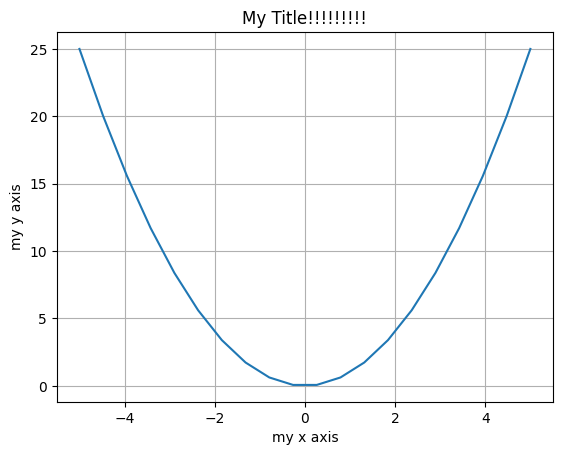

In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])

plt.plot(x, y)
plt.title("My Title!!!!!!!!!")
plt.xlabel("my x axis")
plt.ylabel("my y axis")
plt.grid(1)
plt.show()

What happens if the independent variable is not sorted before plotting? Try plotting directly using the following defined array.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
np.random.shuffle(x)
y = np.array([j ** 2 for j in x])
```

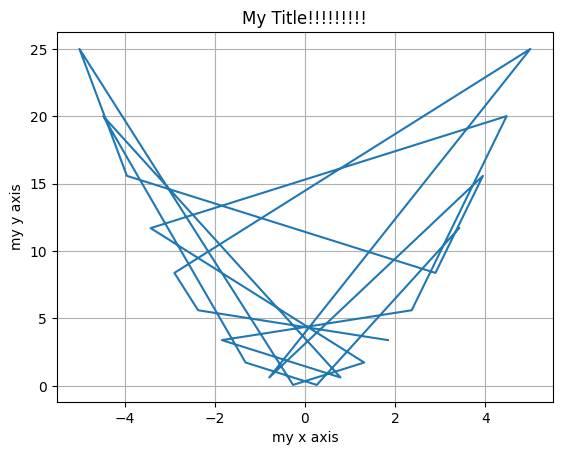

In [15]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
np.random.shuffle(x)
y = np.array([j ** 2 for j in x])
plt.plot(x, y)
plt.title("My Title!!!!!!!!!")
plt.xlabel("my x axis")
plt.ylabel("my y axis")
plt.grid(1)
plt.show()

(b) Create multiple arrays and plot them with different styles, add legends, add text/mathematical equations on the plot.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

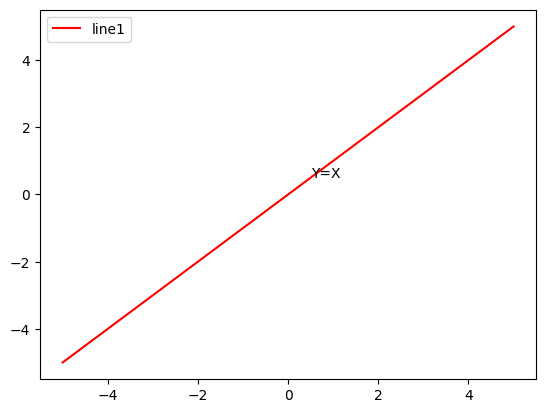

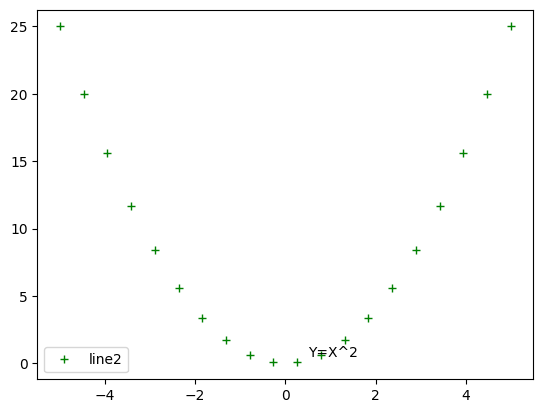

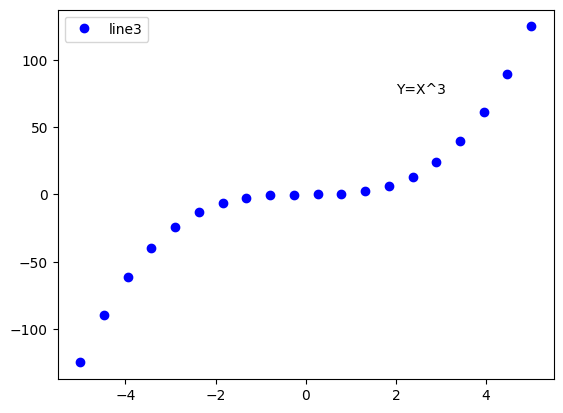

In [16]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

plt.plot(x, y1, color="red", label="Y = X")
plt.legend(["line1"])
plt.text(0.5, 0.5, "Y=X")
plt.show()

plt.plot(x, y2, "g+", label="Y = X^2")
plt.legend(["line2"])
plt.text(0.5, 0.5, "Y=X^2")
plt.show()

plt.plot(x, y3, "bo", label="Y = X^3")
plt.legend(["line3"])
plt.text(2, 75, "Y=X^3")
plt.show()

(c) Create multiple arrays and plot them into one figure **(No multiple figure and no subplot is allowed in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

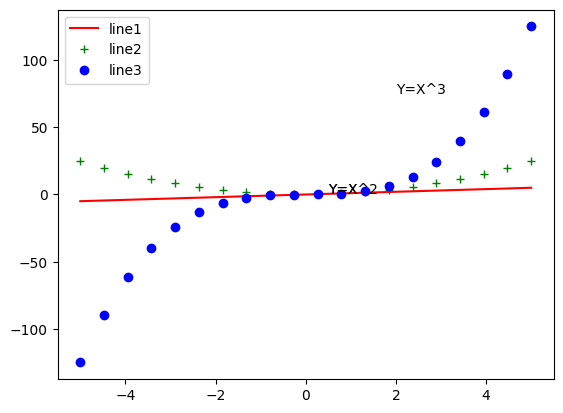

In [17]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

plt.plot(x, y1, color="red", label="Y = X")
plt.text(0.5, 0.5, "Y=X")


plt.plot(x, y2, "g+", label="Y = X^2")
plt.text(0.5, 0.5, "Y=X^2")


plt.plot(x, y3, "bo", label="Y = X^3")
plt.legend(["line1", "line2", "line3"])
plt.text(2, 75, "Y=X^3")
plt.show()

(d) Create multiple subplots, play around with the figure size, figure title, and its font style and font size **(One curve is plotted in one subplot in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

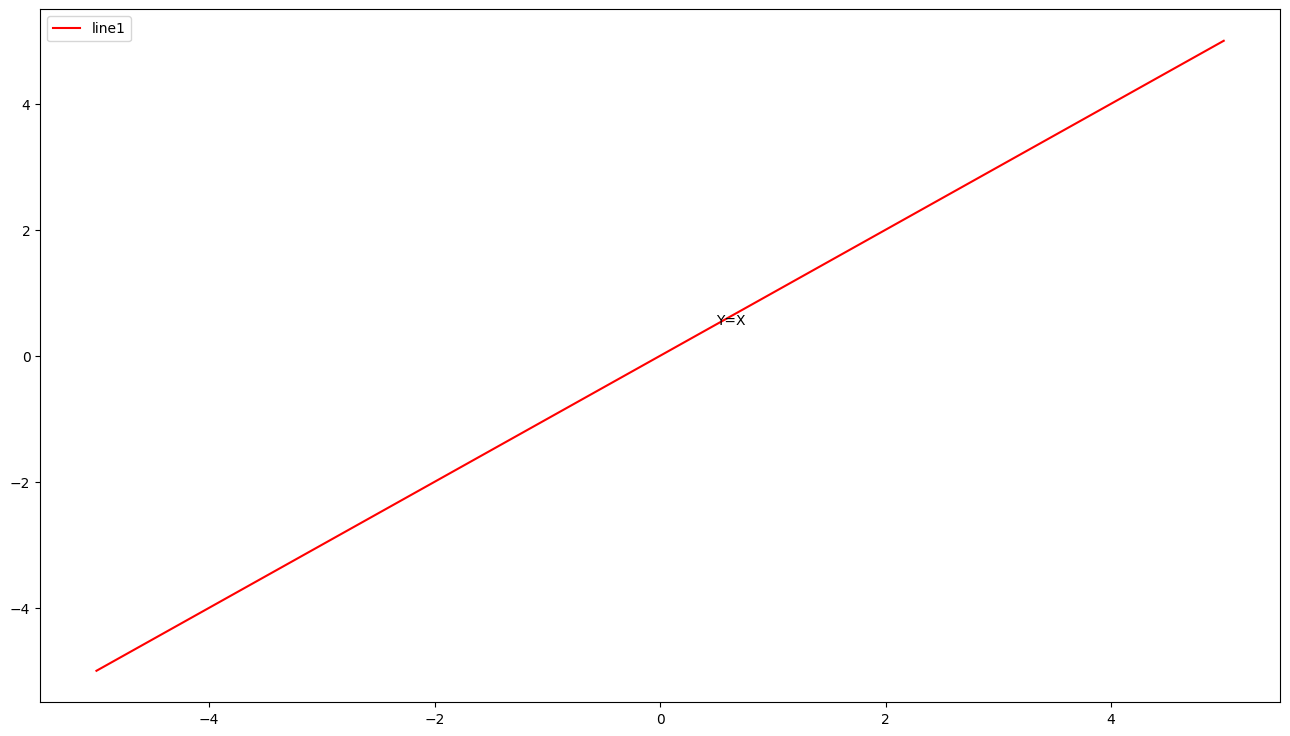

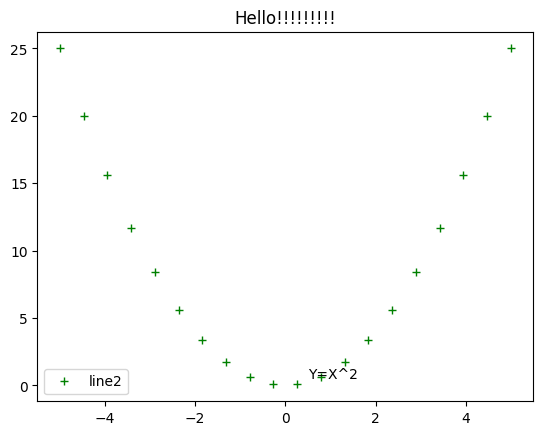

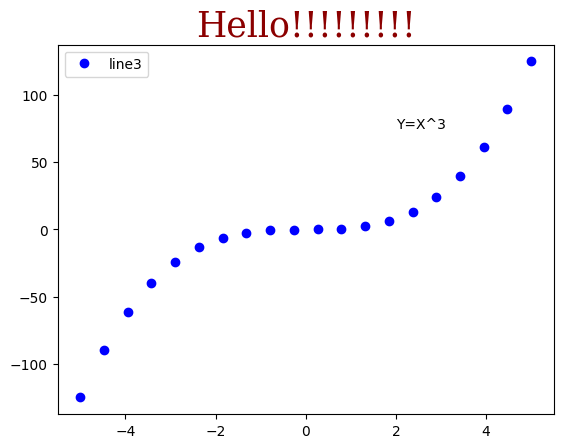

In [18]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

plt.figure(figsize=(16,9))
plt.plot(x, y1, color="red", label="Y = X")
plt.legend(["line1"])
plt.text(0.5, 0.5, "Y=X")
plt.show()

plt.plot(x, y2, "g+", label="Y = X^2")
plt.title("Hello!!!!!!!!!")
plt.legend(["line2"])
plt.text(0.5, 0.5, "Y=X^2")
plt.show()

this_font = {'family':'serif','color':'darkred','size':25} #[2]
plt.plot(x, y3, "bo", label="Y = X^3")
plt.title("Hello!!!!!!!!!", fontdict=this_font)
plt.legend(["line3"])
plt.text(2, 75, "Y=X^3")
plt.show()

(e) Change the limits on x and y axes, **use logarithmic axes to plot**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

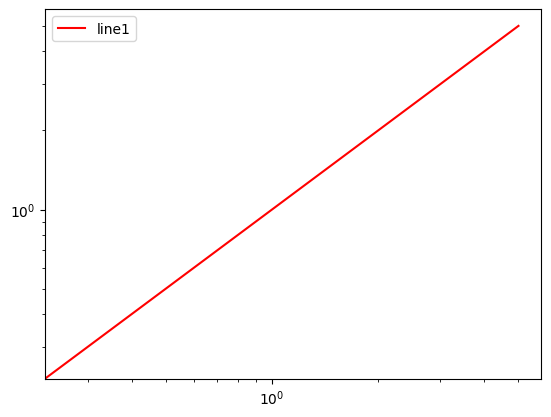

In [19]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])

plt.plot(x, y1, color="red")
plt.legend(["line1"])
plt.xscale("log")
plt.yscale("log")
plt.show()

### Pandas's DataFrame.plot and Seaborn

#### Pandas's DataFrame.plot

Use the Salaries.csv again (You can use the dataframe object loaded from section 3.1).

(a) For team 'ATL', plot a scatter plot between feature yearID and salary.

<Axes: xlabel='Year', ylabel='Salary'>

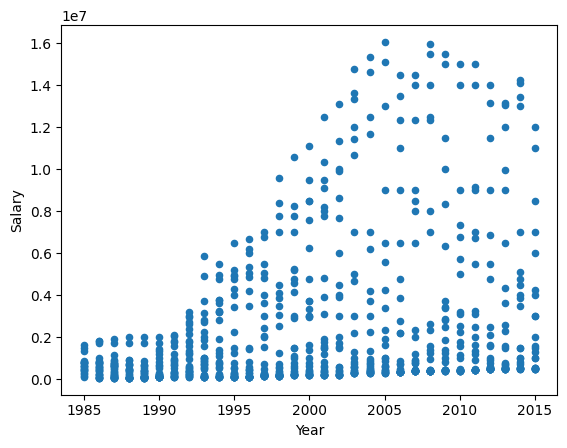

In [20]:
plot_query = new_dataframe.query("teamID == 'ATL'")
plot_query.plot.scatter(x="yearID", y="salary", xlabel="Year", ylabel="Salary")

(b) For year 1985, plot a bar chart to show the average salary for each team.

<Axes: xlabel='Team', ylabel='Salary'>

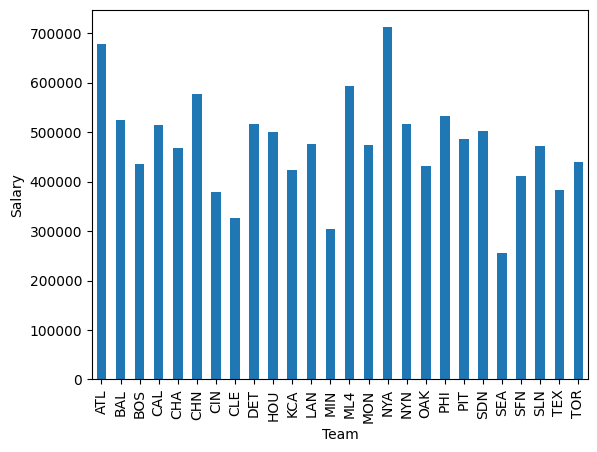

In [21]:
plot_query = new_dataframe.query("yearID == 1985")
grouped_by = plot_query.groupby(["teamID"])["salary"].mean() #[3]
grouped_by.plot.bar(xlabel="Team", ylabel="Salary")

(c) For team 'ATL', plot a line chart to show how the annual average salary change by years.

<Axes: xlabel='Year', ylabel='Salary'>

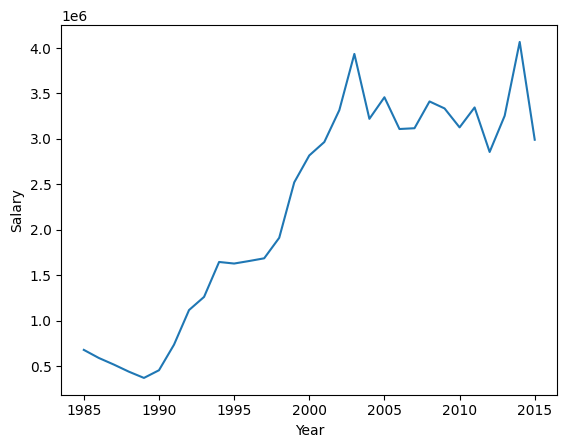

In [22]:
plot_query = new_dataframe.query("teamID == 'ATL'")
line_groups = plot_query.groupby(["yearID"])["salary"].mean() #[3]
line_groups.plot.line(xlabel="Year", ylabel="Salary")

#### Seaborn

(a) Append one more numeric feature to the data frame (can be generated randomly), then for team 'ATL', use the seaborn.pairplot to plot scatter plots among all numeric features in the data frame for team. 

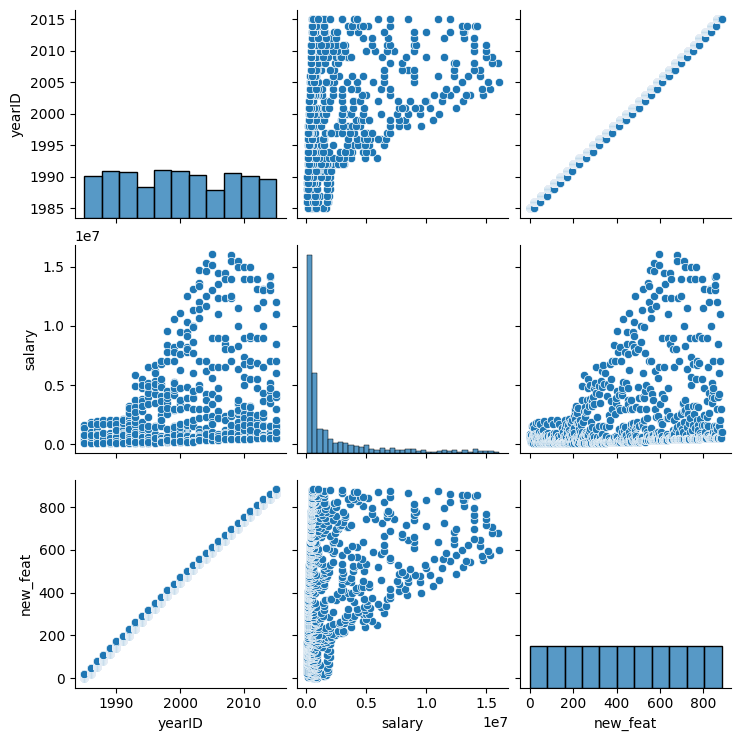

In [23]:
import seaborn

appendation = new_dataframe.query("teamID == 'ATL'")
add_array = []
for i in range(885):
    add_array.append(i)
appendation.insert(4, "new_feat", add_array)
seaborn.pairplot(appendation, kind="scatter")

(b) For year 1985 and for each team, plot a boxplot to show how the salary distribute within a team.

/var/folders/_8/h7ws36k555q0y7ljvf2qrb1h0000gn/T/ipykernel_74091/1125272909.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(axis.get_xticklabels(), rotation=90) #[4]


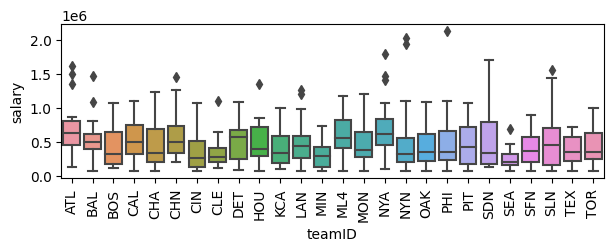

In [24]:
plot_query = new_dataframe.query("yearID == 1985")
start, axis = plt.subplots(figsize=(7, 2)) #[4]
axis.set_xticklabels(axis.get_xticklabels(), rotation=90) #[4]
newplot = seaborn.boxplot(plot_query, x=plot_query["teamID"], y=plot_query["salary"], ax=axis)

(c) Read the offical documentation (https://seaborn.pydata.org/) to understand how lmplot, catplot, relplot, and jointplot works.

### Jupyter Notebook

#### Jupyter Notebook Extensions

Extensions such as the code formatter, table of content is to make your development more efficient. To explore it, please refer to https://github.com/ipython-contrib/jupyter_contrib_nbextensions.

#### Jupyter Visual Debugger

The Pixie Debugger is a visual debugger for debugging on Jupyter Notebook. To explore it, please refer to https://medium.com/codait/the-visual-python-debugger-for-jupyter-notebooks-youve-always-wanted-761713babc62.

### Git and GitHub

1. In the directory that where this jupyter notebook file locates in, init a Git repository.
2. Checkout a new branch called dev and commit the current notebook within this branch.
3. Merge the dev branch to the master branch (the default branch).
4. Create a temporary repository (just for practicing and you can delete it later) in GitHub. 
5. Push new changes in the master branch to the remote repository created in step 4.
6. Checkout the dev branch again and do some changes to your notebook, and then repeat step 3 and step 5.

[1] https://sparkbyexamples.com/pandas/pandas-get-index-from-dataframe/

[2] https://www.educative.io/answers/how-to-set-font-properties-for-title-and-labels-in-matplotlib

[3] https://www.statology.org/pandas-mean-by-group/

[4] https://www.dunderdata.com/blog/Automatically%20Wrap%20Graph%20Labels%20in%20Matplotlib%20and%20Seaborn